## Observations and Insights 

In [112]:
%matplotlib notebook

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata, study_results)
# Display the data table for preview
combined_df.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [114]:
# See how system is reading column names
combined_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [115]:
combined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [116]:
# Checking the number of mice.
unique_mice=combined_df['Mouse ID'].unique()

grouped_mice=combined_df.groupby('Mouse ID')
grouped_mice.count()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [129]:
#mouse_index=combined_df.set_index('Mouse ID')
#mouse_index.head()
#grouped_mice.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicates=combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])
# duplicates



In [128]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[duplicates, :]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [131]:
study_mice=combined_df[combined_df["Mouse ID"]!="g989"]
study_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [119]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# cleaned_df=combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
# cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [120]:
# Checking the number of mice in the clean DataFrame.
cleaned_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [132]:
unique_mice_cleaned=study_mice['Mouse ID'].unique()
len(unique_mice_cleaned)
#study_mice=cleaned_df.groupby('Mouse ID')
#study_mice.count()

248

## Summary Statistics

In [122]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following 
#properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.



In [133]:
study_mice.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [140]:
regimen_grouped=study_mice.groupby("Drug Regimen")

mean=regimen_grouped.mean()["Tumor Volume (mm3)"]
# mean
median=regimen_grouped.median()["Tumor Volume (mm3)"]
# median

variance=regimen_grouped.var()["Tumor Volume (mm3)"]
# variance

standard_dev=regimen_grouped.std()["Tumor Volume (mm3)"]
# standard_dev

sem=regimen_grouped.sem()["Tumor Volume (mm3)"]
sem


#regimen_grouped["Tumor Volume (mm3)"].median()
##summary_df={

# regimen_grouped.head()

# cleaned_df.groupby("Drug Regimen", "Tumor Volume (mm3)").mean()

#regimen_mean=regimen_grouped.loc("Tumor Volume (mm3)").mean()
#regimen=cleaned_df.groupby("Drug Regimen").mean()
#regimen

# mean_numpy=np.mean(cleaned_df)
# print(mean_numpy)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [141]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_data=regimen_grouped.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
aggregate_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# pandas can use a dataframe or series, but matplotlib requires lists 
# () are a tuple can't change order or any of the elements - once you make it can't change anything inside
# grab elements by index and can loop through tuples
# [] are a list 
#use () to call a function to run, what you pass in between the () is the arguments


# need to get the # of mice tested for each regimen 

<IPython.core.display.Javascript object>


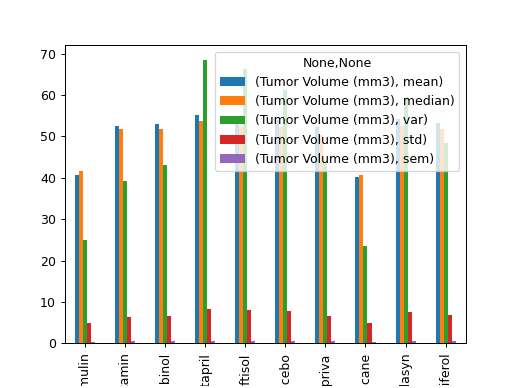

<AxesSubplot:xlabel='Drug Regimen'>

In [142]:
aggregate_data.plot(kind="bar")

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# can do a filter and groupby mouseID
#filtered_mice=combined_df.groupby('Mouse ID')
#filtered_mice.groupby('Timepoint')
#filtered_mice_drop=combined_df.drop_duplicates(filtered_mice["Timepoint"])

#duplicate=filtered_mice.loc[filtered_mice['Timepoint']==['Timepoint']]

# pandas dataframe .duplicated 
# google how to find duplicated items in a dataframe
# only one mouse is duplicated 

# duplicate_mouse=filtered_mice[filtered_mice('Mouse ID', 'Timepoint')]
# duplicate_mouse

#combined_df.drop_duplicates
#combined_df.duplicated('Mouse ID', 'Timepoint')

# mouse_index.loc[:, 'Timepoint'].unique()

In [ ]:
# grouped_mice.drop_duplicates[grouped_mice("Timepoint")]
# grouped_mice.drop_duplicates()

#mouse_count=unique_mice.value_counts()
#mouse_count
